In [9]:
from sklearn import tree
from pychord_tools.models import load_model

import json
import glob, os
path_data = '/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/'

files = glob.glob(path_data + '*.wav')

songs = ['Lily','Mountain','Century','Where','Hole','Train']

anno = ['/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Lily Was Here/Lily Was Here.json',
        '/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Mountain At My Gates/Mountain At My Gates.json',
        '/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/20th Century Boy/20th Century Boy.json',
        '/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Where Did You Sleep Last Night/Where Did You Sleep Last Night.json',
        '/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Hole In My Shoe/Hole In My Shoe.json', 
        '/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Runaway Train/Runaway Train.json']  

ex_2_id={0:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Lily Was Here/Lily Was Here.json',
         1:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Mountain At My Gates/Mountain At My Gates.json',
         2:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/20th Century Boy/20th Century Boy.json',
         3:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Where Did You Sleep Last Night/Where Did You Sleep Last Night.json',
         4:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Hole In My Shoe/Hole In My Shoe.json',
         5:'/home/eduard/Escritorio/TFG_EduardVergesFranch/test_data/Runaway Train/Runaway Train.json'}

count = 0
file_list = []
for f in files:
    info = {'id':0,
       'path':'',
       'exercise_id':'',
       'latency' :0.0,
        'name' : ''}
    name = f.replace(path_data,'')
    info['id'] = count
    info['path'] = f.replace(path_data,'')
    info['name'] = name
    song = name.split('_')[0]
    info['exercise_id'] = [i for i,f in enumerate(songs) if f == song][0]

    file_list.append(info)
    count += 1

jsonString = json.dumps(file_list)
jsonFile = open(path_data + "references.json", "w")
jsonFile.write(jsonString)
jsonFile.close()

In [7]:
# Check if loads correctly

In [7]:
import sys
sys.path.append('/')
sys.path.append('./test_code/test_utils/')
from test_utils.training_individual_chord_model import NewModel, SimUidAndAudioPathExtractor, load_file_list

import os
import numpy as np
import json

from pychord_tools.low_level_features import  AnnotatedBeatChromaEstimator, AnnotatedChromaSegments
from pychord_tools.third_party import NNLSChromaEstimator
from pychord_tools.low_level_features import AudioPathExtractor, UidExtractor

from simmusic.feature_extraction import AdaptiveChromaEstimator, GuitarLabelTranslator
from simmusic.latency import remove_latency

In [8]:
from Training_Model import load_submissions

In [9]:
class ExerciseAudioPathExtractor(AudioPathExtractor, UidExtractor):
    def set(self, audio_path, uid_value):
        self.audio_path = audio_path
        self.uid_value = uid_value

    def audio_path_name(self, uid):
        return self.audio_path

    def uid(self, annotation_file_name):
        return self.uid_value
segments = AnnotatedChromaSegments(
            labels=np.array([], dtype='object'),
            pitches=np.array([], dtype='int'),
            kinds=np.array([], dtype='object'),
            chromas=np.zeros((0, 12), dtype='float32'),
            uids=np.array([], dtype='object'),
            start_times=np.array([], dtype='float32'),
            durations=np.array([], dtype='float32'))

# Load Segments

In [10]:
with open(path_data+ "references.json") as af:
    submissions = json.load(af)

In [11]:
path_extractor = ExerciseAudioPathExtractor()

chromaEstimator = AnnotatedBeatChromaEstimator(
    chroma_estimator=NNLSChromaEstimator(audio_path_extractor=path_extractor),
    segment_chroma_estimator=AdaptiveChromaEstimator(),
    label_translator=GuitarLabelTranslator(),
    uid_extractor=path_extractor)


segments = load_submissions(chromaEstimator, path_extractor, ex_2_id, submissions, segments, path_data)
print('Loaded submissions')

Lily_Telecaster_108_DI.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Lily_Telecaster_108_DI.wav
Hole_Epiphone_102_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Hole_Epiphone_102_Mobile.wav
Train_Larrivee_112_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Train_Larrivee_112_Mobile.wav
Lily_Eastman_108_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Lily_Eastman_108_Computer.wav
Mountain_Ibanez_104_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Mountain_Ibanez_104_Computer.wav
Lily_Telecaster_108_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Lily_Telecaster_108_Mobile.wav
Mountain_Larrivee_104_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Mountain_Larrivee_104_Computer.wav
Century_130_Reference.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Century_130_Reference.wav
Mountain_Epiphone_104_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Mountain_Epiphone_104_Computer.wav
Century_Larrivee_130_DI.w

Where_Eastman_100_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Where_Eastman_100_Mobile.wav
Lily_Larrivee_108_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Lily_Larrivee_108_Mobile.wav
Train_Larrivee_112_DI.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Train_Larrivee_112_DI.wav
Where_Larrivee_100_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Where_Larrivee_100_Computer.wav
Hole_Ibanez_102_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Hole_Ibanez_102_Mobile.wav
Train_Telecaster_112_DI.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Train_Telecaster_112_DI.wav
Where_Epiphone_100_DI.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Where_Epiphone_100_DI.wav
Where_Telecaster_100_Computer.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Where_Telecaster_100_Computer.wav
Where_Ibanez_100_Mobile.wav
/home/eduard/Escritorio/TFG_DATABASE_PROCESSED/Where_Ibanez_100_Mobile.wav
Lily_108_Reference.wav
/home/eduard/Escritorio/TFG_DATABASE

# Splitting Train/Test

In [12]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [54]:
def plot_conf_matrix(y_test, predictions):
    labels = list(set(y_test + predictions))
    
    cm = confusion_matrix(y_test, predictions, labels = labels)


    plt.figure(figsize = (15,15))

    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title('Simple Confusion Matrix')
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(labels))

    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i,j] > 0:
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     verticalalignment = 'center',
                     color="white" if cm[i, j] > thresh else "black")
    plt.grid(alpha = 0.3)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [17]:
X = segments.chromas
y = segments.kinds

idx = np.where(y != 'unclassified')

y = y[idx]
X = X[idx]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [28]:
y_pitch = segments.pitches
y_labels = segments.labels

y_pitch = y_pitch[idx]
y_labels = y_labels[idx]

In [31]:
X_train_l, X_test_l,y_train_l,y_test = train_test_split(X, y_labels, test_size=0.33, random_state=2)

In [45]:
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_pitch, test_size=0.33, random_state=2)

# Current Approach

In [60]:
import sys
sys.path.append('../')
sys.path.append('./test_utils/')
sys.path.append('./test_utils/models/')
from training_individual_chord_model import *

In [61]:
segments = AnnotatedChromaSegments(
            labels = np.array([], dtype='int'),
            pitches=np.array([], dtype='int'),
            kinds= y_train,
            chromas= X_train,
            uids=np.array([], dtype='object'),
            start_times=np.array([], dtype='float32'),
            durations=np.array([], dtype='float32'))

In [62]:
m = NewModel(
        {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '5': ['I', 'V'], '1': ['I','III']},
        {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

m.fit(segments)

Now training:  maj
Now training:  min
Now training:  5
Now training:  1


In [63]:
predictions = m.predict(X_test)
clean_pred = [str(pred).split(':')[-1] for pred in list(predictions[0])]

In [64]:
accuracy_score(y_test,clean_pred)

0.8542713567839196

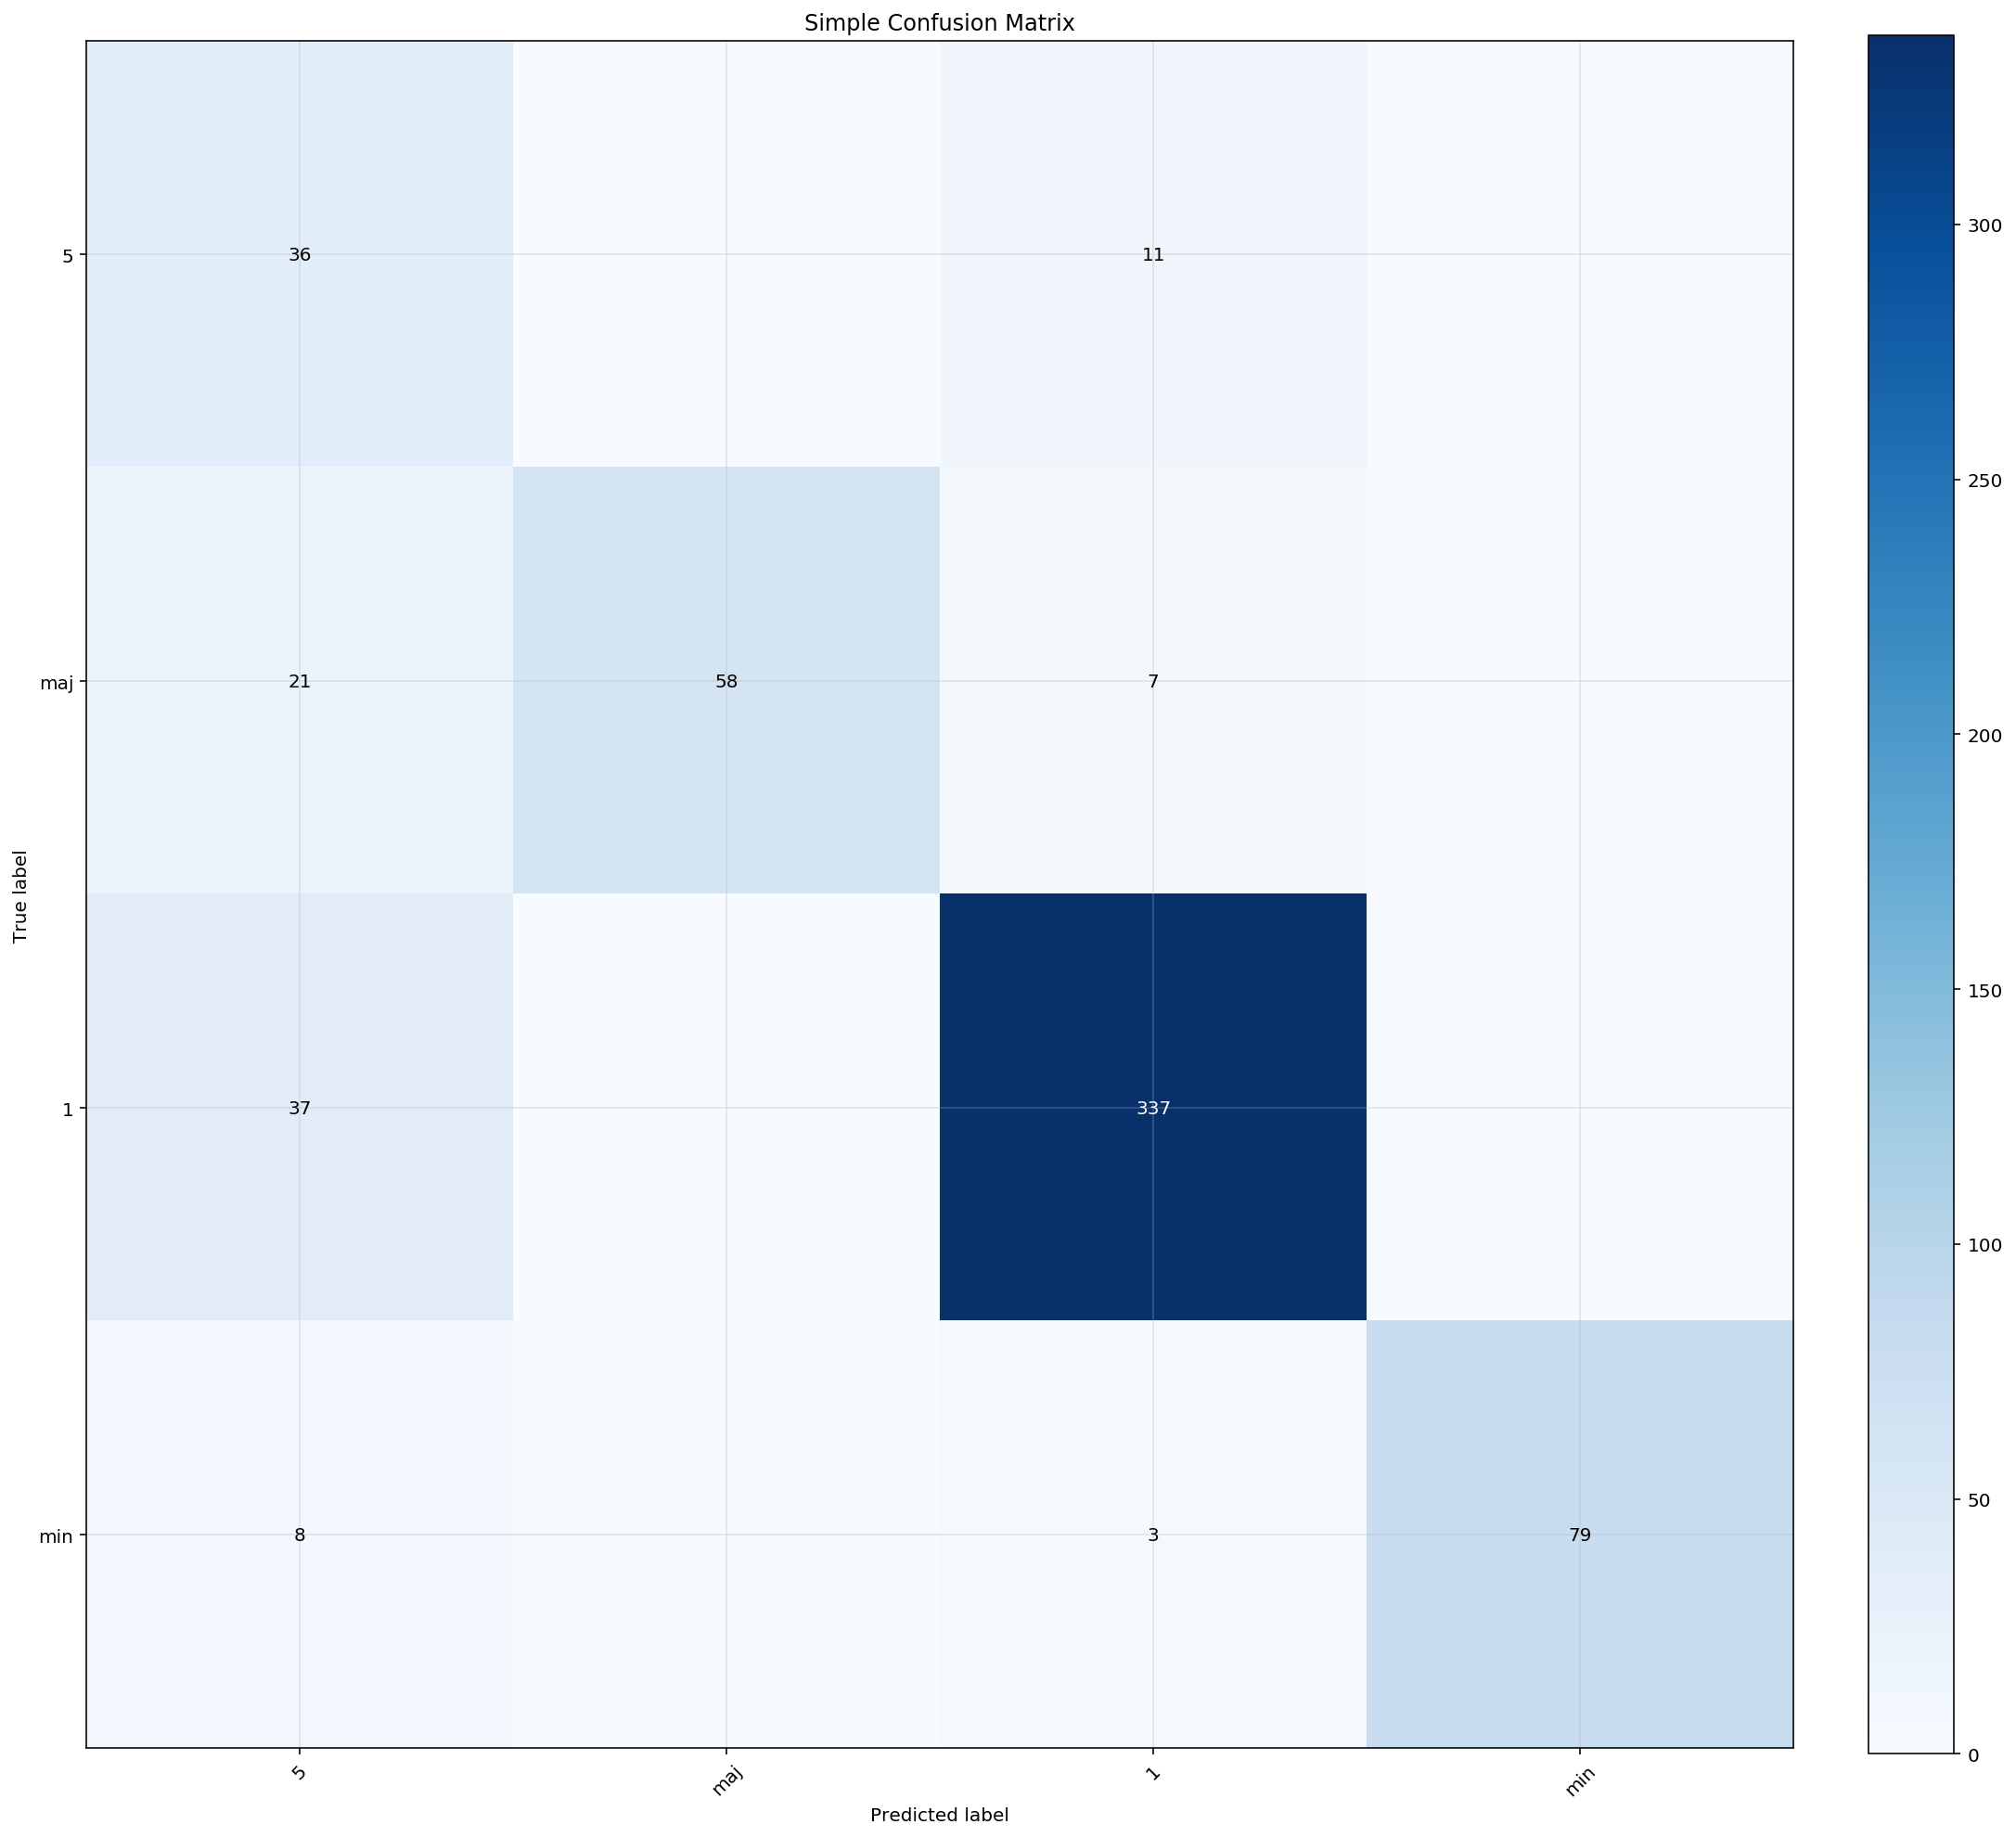

In [65]:
plot_conf_matrix(y_test, clean_pred)

# Decision Trees Approach

Pitch

In [46]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train_p, y_train_p)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
predictions = clf.predict(X_test_p)

In [51]:
predictions

array([ 9,  9,  0, ...,  7,  2, 11])

In [50]:
y_test_p

array([ 4,  9,  7, ...,  7,  2, 11])

In [49]:
accuracy_score(y_test_p,predictions)

0.6101505856107083

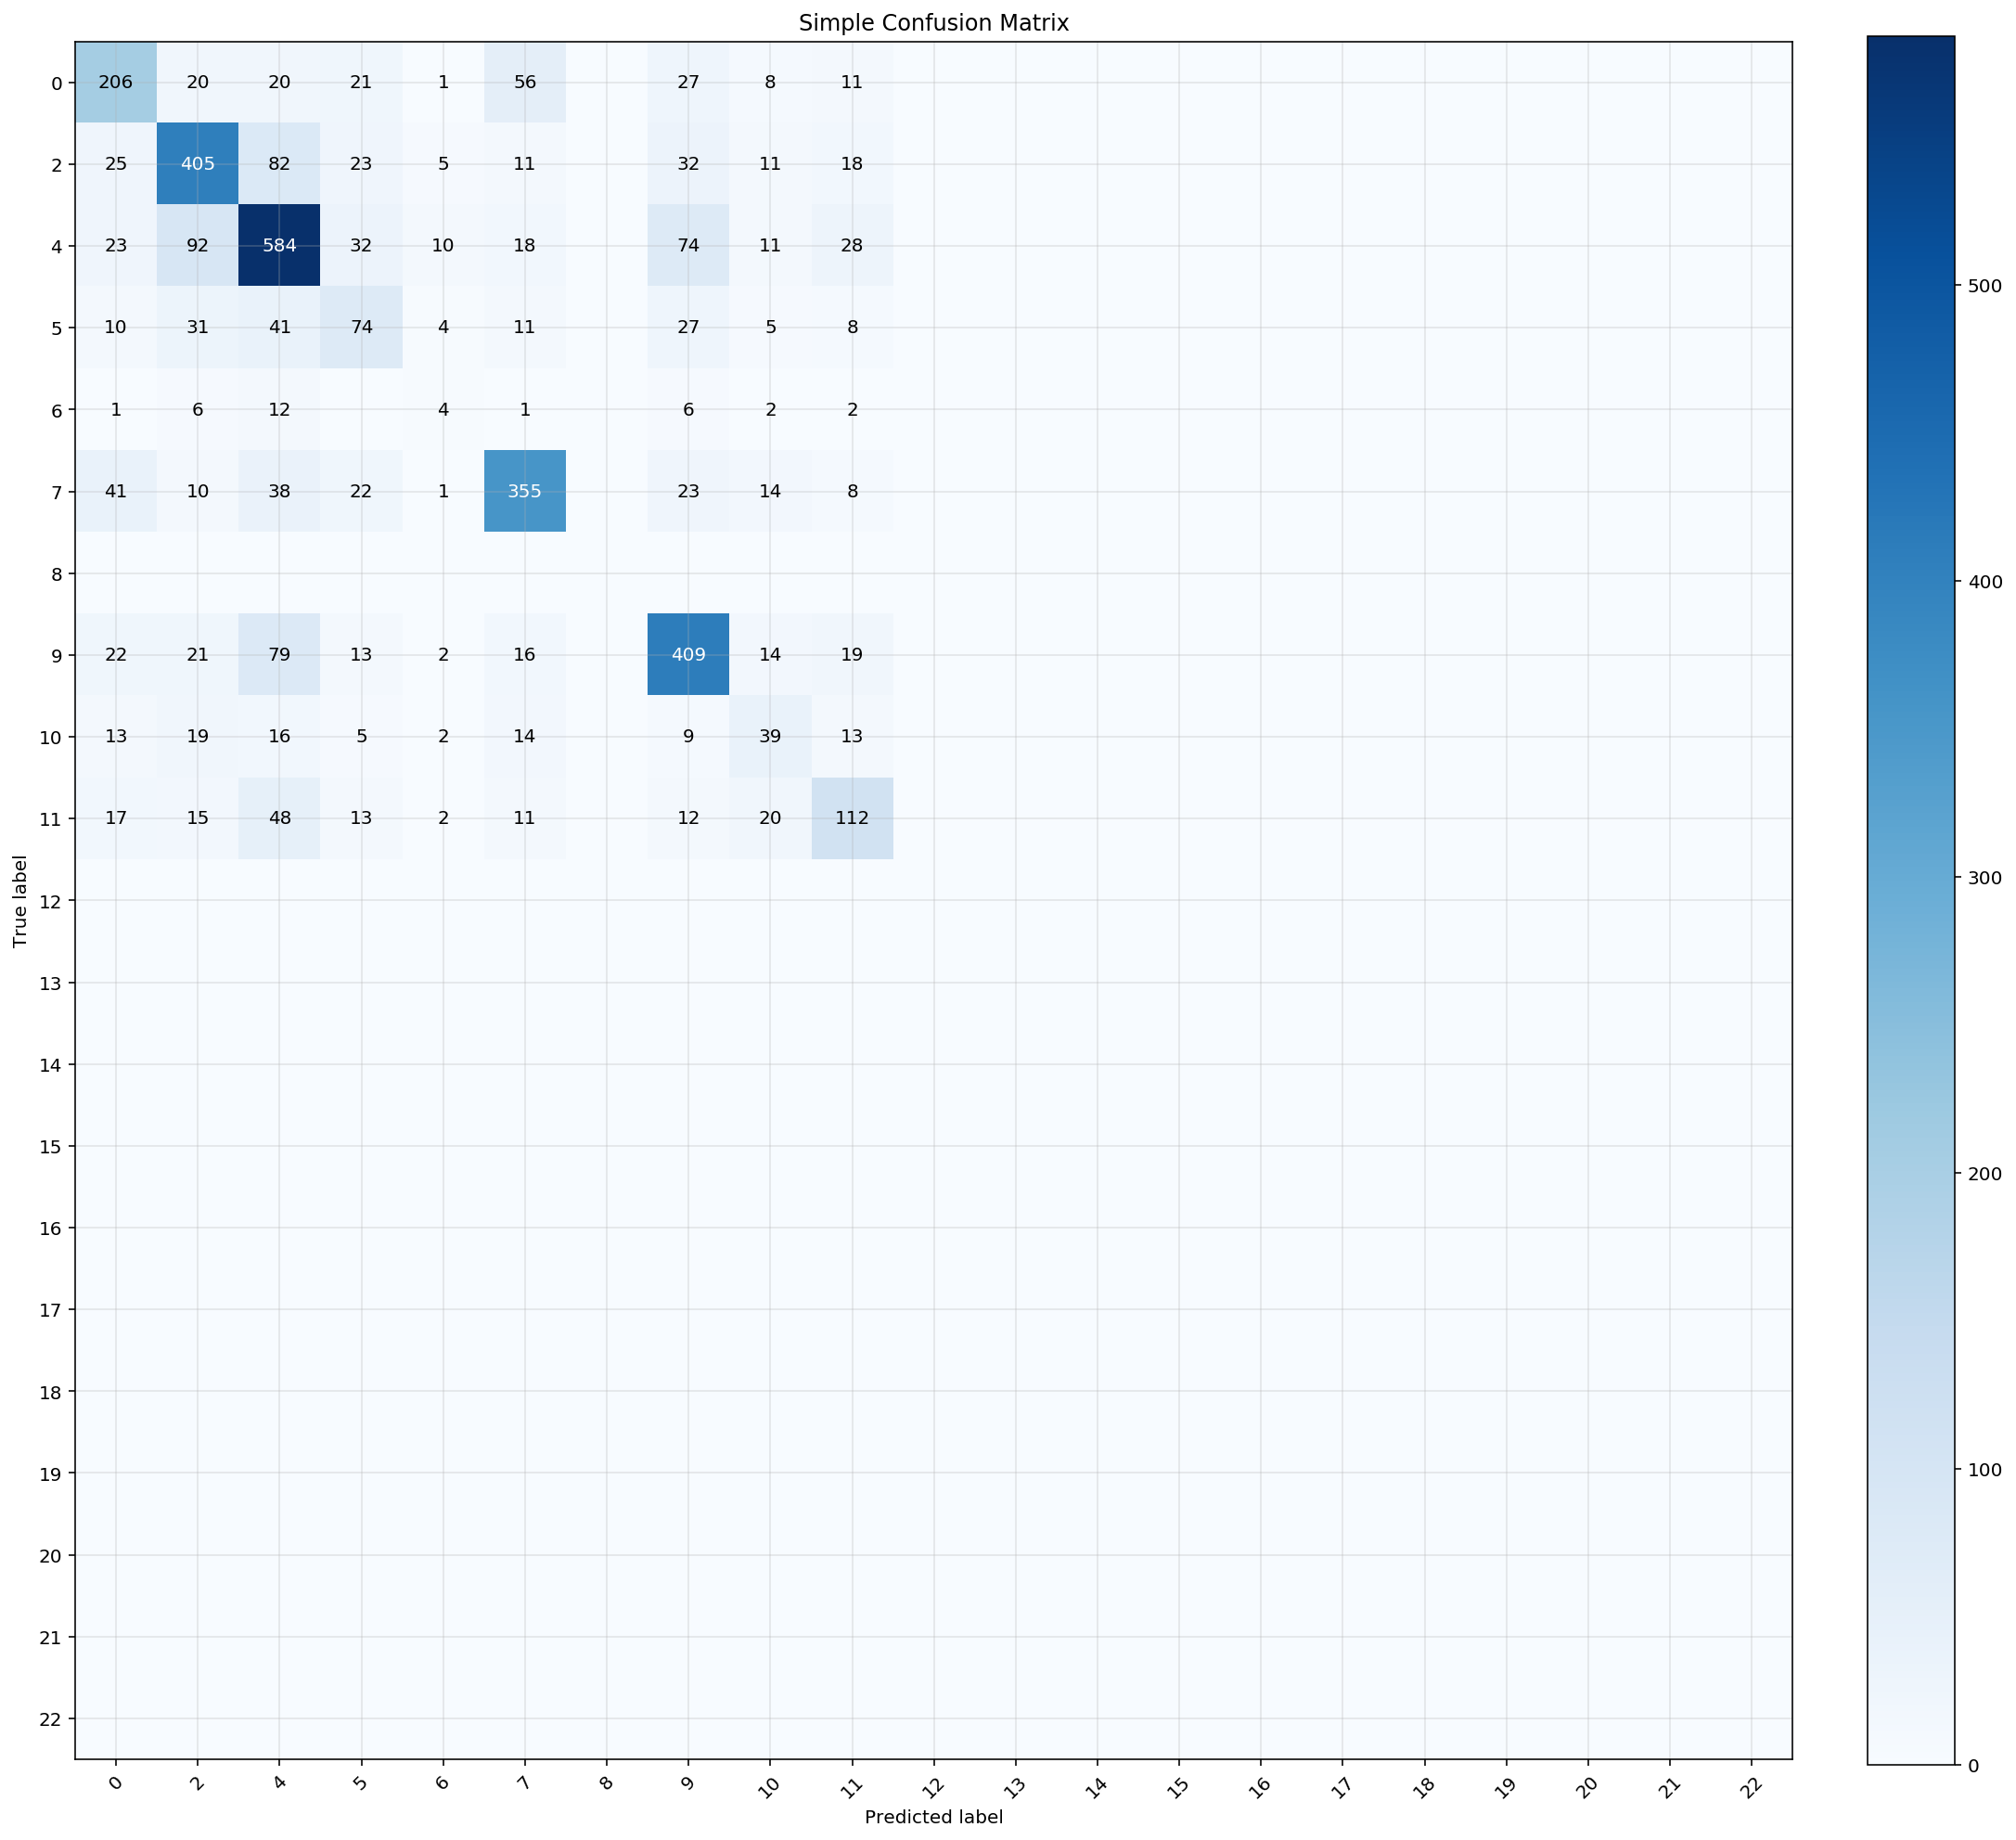

In [55]:
import matplotlib.pyplot as plt
import itertools
plot_conf_matrix(y_test_p, predictions)  

Kind

In [66]:
X = segments.chromas
y = segments.kinds

idx = np.where(y != 'unclassified')

y = y[idx]
X = X[idx]

In [67]:
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
predictions = clf.predict(X_test)

In [69]:
accuracy_score(y_test,predictions)

0.949748743718593

In [70]:
import matplotlib.pyplot as plt
import itertools

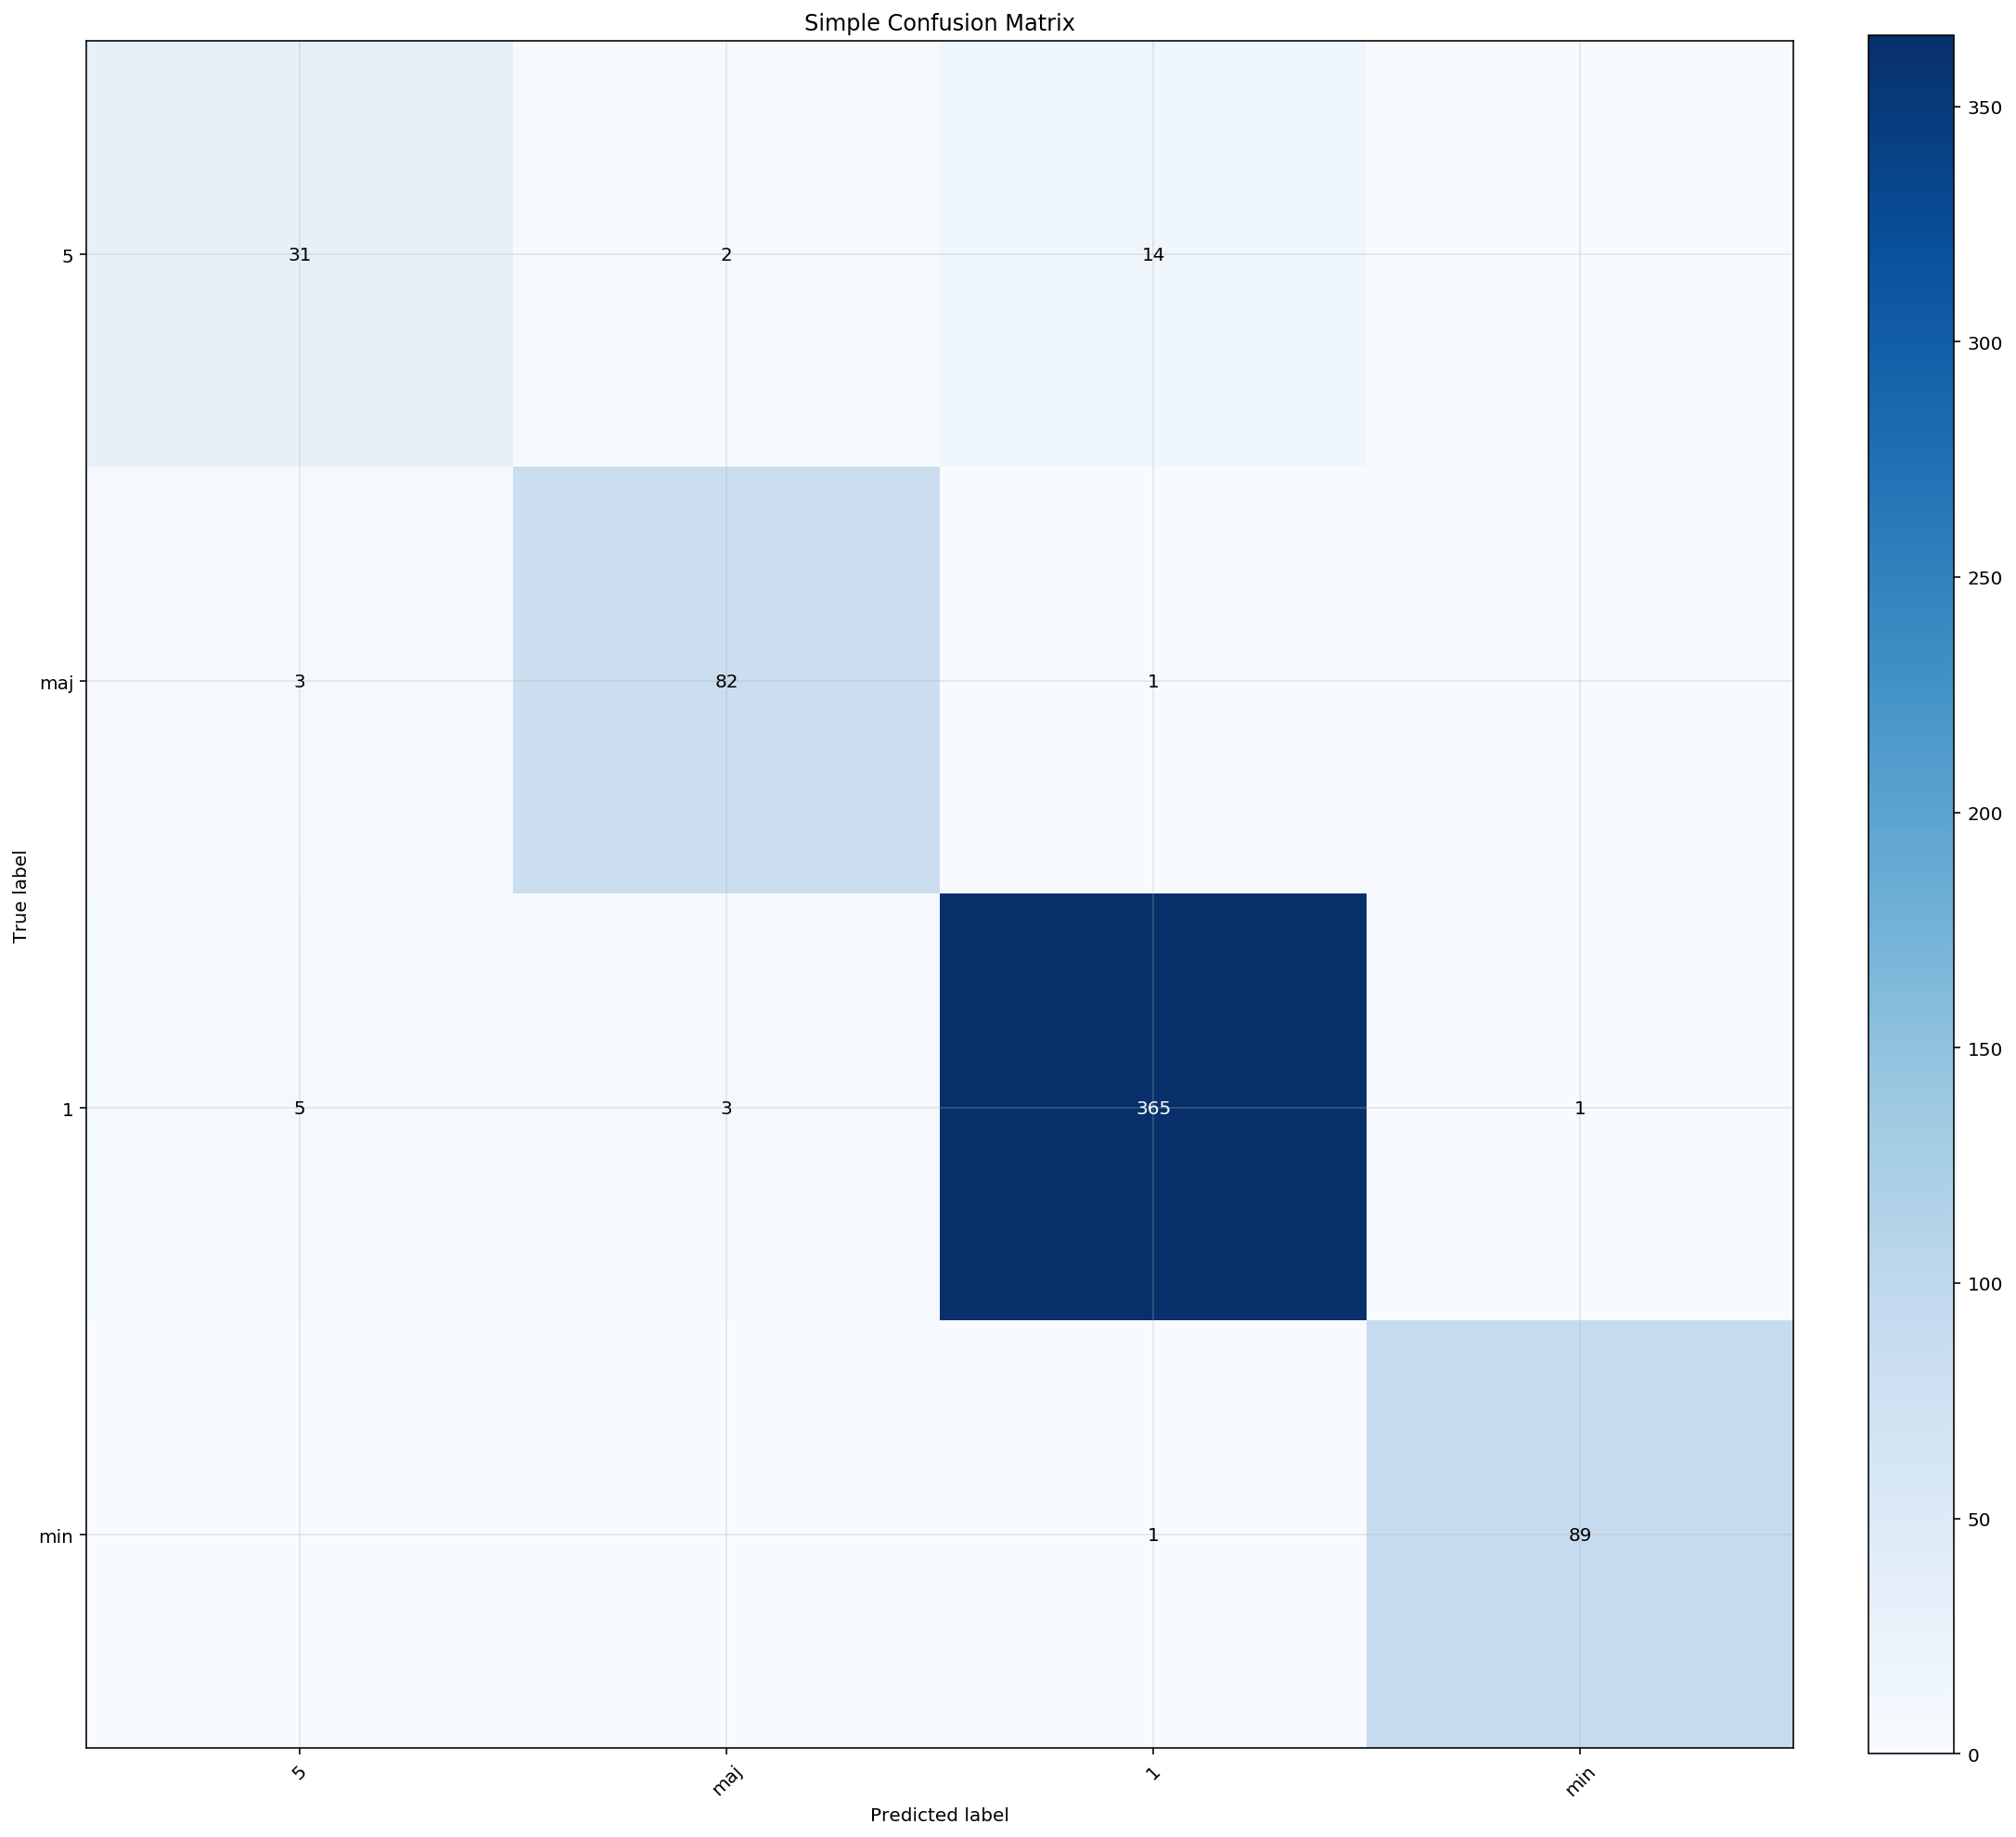

In [71]:
plot_conf_matrix(y_test, predictions)        